# Clasificador de imágenes

In [1]:
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
#from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
#from keras.applications.efficientNet import EfficientNetB7
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Configuración de parámetros

In [2]:
width_shape = 224
height_shape = 224
num_classes = 35
epochs = 50
batch_size = 32 
nb_train_samples = 5195
nb_validation_samples = 175

In [3]:
modelt = load_model("model35_-3_VGG16.h5")
modelt.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Matriz de confusión y métricas de desempeño

In [5]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['AMERICAN_AVOCET', 'AMERICAN_COOT', 'AMERICAN_KESTREL', 'AMERICAN_REDSTART', 
         'ANHINGA', 'BALTIMORE_ORIOLE', 'BARN_OWL', 'BARN_SWALLOW', 'BELTED_KINGFISHER', 
         'BLACK_SKIMMER', 'BLACK_VULTURE', 'CASPIAN_TERN', 'CRESTED_CARACARA', 'EASTERN_BLUEBIRD', 
         'EASTERN_MEADOWLARK', 'ELEGANT_TROGON', 'HOUSE_SPARROW', 'KILLDEER', 'MOURNING_DOVE', 
         'NORTHERN_JACANA', 'NORTHERN_SHOVELER', 'OSPREY', 'OVENBIRD', 'PEREGRINE_FALCON', 
         'PURPLE_GALLINULE', 'PURPLE_MARTIN', 'RED_TAILED_HAWK', 'RED_WINGED_BLACKBIRD', 
         'SHORT_BILLED_DOWITCHER', 'SNOWY_EGRET', 'TOWNSENDS_WARBLER', 'TREE_SWALLOW', 'TURKEY_VULTURE' , 
         'TURQUOISE_MOTMOT', 'WHIMBREL']


test_data_dir = r'test'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("model35_-3_VGG16.h5")

predictions = custom_Model.predict(test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 175 images belonging to 35 classes.


C:\Users\Joadan Huzim Duarte\.conda\envs\Jack\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joadan Huzim Duarte\.conda\envs\Jack\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joadan Huzim Duarte\.conda\envs\Jack\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0     0.3333    0.6000    0.4286         5
           1     0.8000    0.8000    0.8000         5
           2     0.3333    0.2000    0.2500         5
           3     0.0000    0.0000    0.0000         5
           4     0.0000    0.0000    0.0000         5
           5     0.0000    0.0000    0.0000         5
           6     0.5000    0.8000    0.6154         5
           7     0.1000    0.2000    0.1333         5
           8     0.0000    0.0000    0.0000         5
           9     0.0000    0.0000    0.0000         5
          10     0.0000    0.0000    0.0000         5
          11     0.3333    1.0000    0.5000         5
          12     0.0000    0.0000    0.0000         5
          13     0.1111    0.2000    0.1429         5
          14     0.0000    0.0000    0.0000         5
          15     0.0000    0.0000    0.0000         5
          16     0.0000    0.0000    0.0000         5
          17     0.4000    

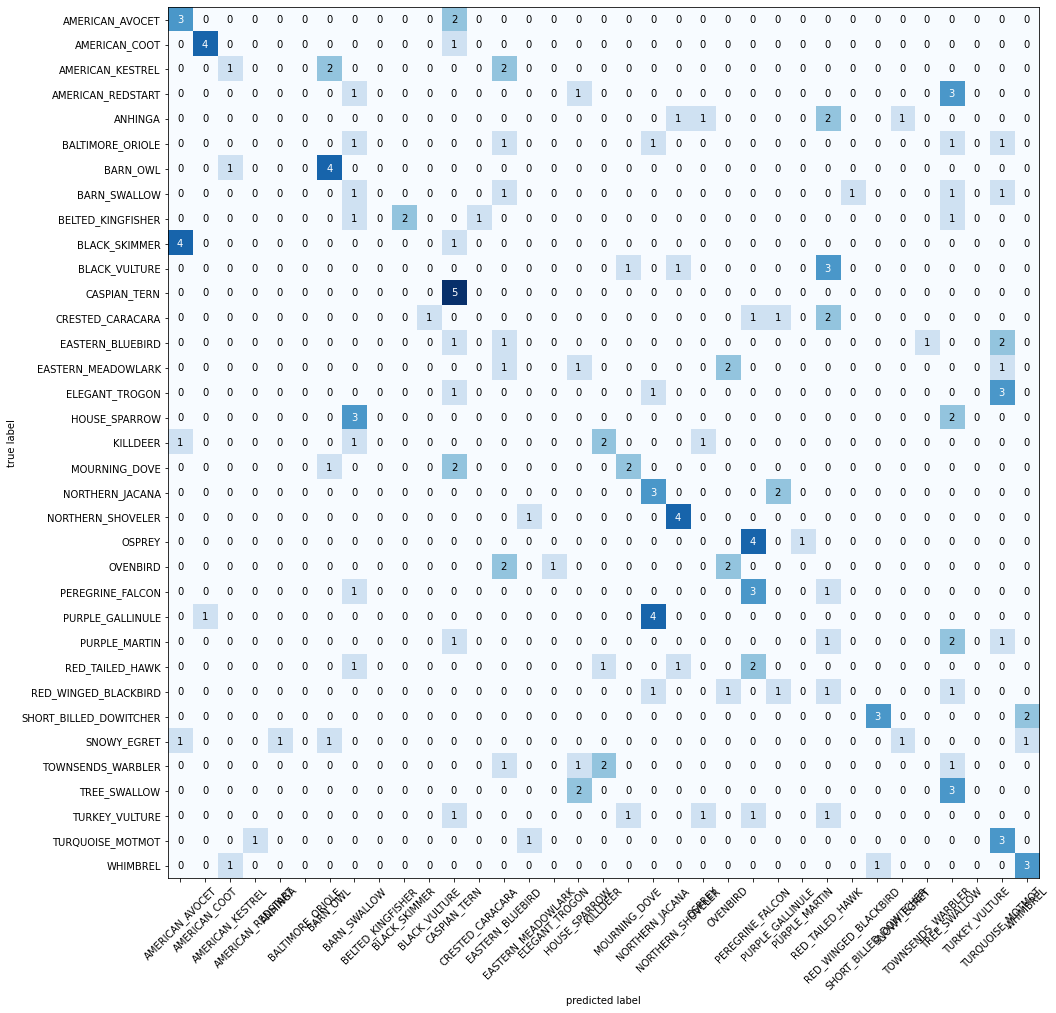

In [6]:
matc=confusion_matrix(y_real, y_pred)

names = ['AMERICAN_AVOCET', 'AMERICAN_COOT', 'AMERICAN_KESTREL', 'AMERICAN_REDSTART', 
         'ANHINGA', 'BALTIMORE_ORIOLE', 'BARN_OWL', 'BARN_SWALLOW', 'BELTED_KINGFISHER', 
         'BLACK_SKIMMER', 'BLACK_VULTURE', 'CASPIAN_TERN', 'CRESTED_CARACARA', 'EASTERN_BLUEBIRD', 
         'EASTERN_MEADOWLARK', 'ELEGANT_TROGON', 'HOUSE_SPARROW', 'KILLDEER', 'MOURNING_DOVE', 
         'NORTHERN_JACANA', 'NORTHERN_SHOVELER', 'OSPREY', 'OVENBIRD', 'PEREGRINE_FALCON', 
         'PURPLE_GALLINULE', 'PURPLE_MARTIN', 'RED_TAILED_HAWK', 'RED_WINGED_BLACKBIRD', 
         'SHORT_BILLED_DOWITCHER', 'SNOWY_EGRET', 'TOWNSENDS_WARBLER', 'TREE_SWALLOW', 'TURKEY_VULTURE' , 
         'TURQUOISE_MOTMOT', 'WHIMBREL']
plot_confusion_matrix(matc, figsize=(14.5,14.5), class_names = names)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

# Predicción usando el modelo entrenado

WHIMBREL


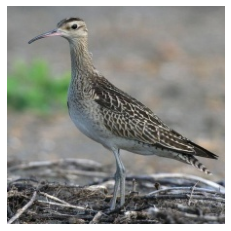

In [21]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['AMERICAN_AVOCET', 'AMERICAN_COOT', 'AMERICAN_KESTREL', 'AMERICAN_REDSTART', 'ANHINGA', 'BALTIMORE_ORIOLE',
         'BARN_OWL', 'BARN_SWALLOW', 'BELTED_KINGFISHER', 'BLACK_SKIMMER', 'BLACK_VULTURE', 'CASPIAN_TERN', 
         'CRESTED_CARACARA', 'EASTERN_BLUEBIRD', 'EASTERN_MEADOWLARK', 'ELEGANT_TROGON', 'HOUSE_SPARROW', 'KILLDEER', 
         'MOURNING_DOVE', 'NORTHERN_JACANA', 'NORTHERN_SHOVELER', 'OSPREY', 'OVENBIRD', 'PEREGRINE_FALCON', 'PURPLE_GALLINULE', 
         'PURPLE_MARTIN', 'RED_TAILED_HAWK', 'RED_WINGED_BLACKBIRD', 'SHORT_BILLED_DOWITCHER', 'SNOWY_EGRET',
         'TOWNSENDS_WARBLER', 'TREE_SWALLOW', 'TURKEY_VULTURE' , 'TURQUOISE_MOTMOT', 'WHIMBREL']

#modelt = custom_vgg_model

imaget_path = r"test/WHIMBREL/4.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
print(y_pred)

[11  0  0  0  0  1  1  1 11  1 13  6 13  6  2  7 31 16 31 31 20 29 21 26
  4 13 33  7 31 19  6  6  6  2  6 27  7 33 13 31  9 12 31  9  7  0  0 11
  0  0 26 18 26 26 20 11 11 11 11 11 26 26 10 24 23 13 30 11 33 33 16 22
 33 13 22  7 33 11 19 33  7 31  7  7 31 17 17  0  7 21 11 18 18 11  6 19
 19 24 19 24 20 20 20 20 20 23 23 23 25 23 13 15 13 22 22 23 23 23 26  7
 19 19 19  1 19 33 11 31 26 31 23 23 17  7 20 31 24 26 19 22 28 34 28 34
 28  4 29 34  6  0 17 16 13 17 31 16 31 31 31 26 18 11 26 23 21 33 14  3
 33 33 34 24 28 34  2]


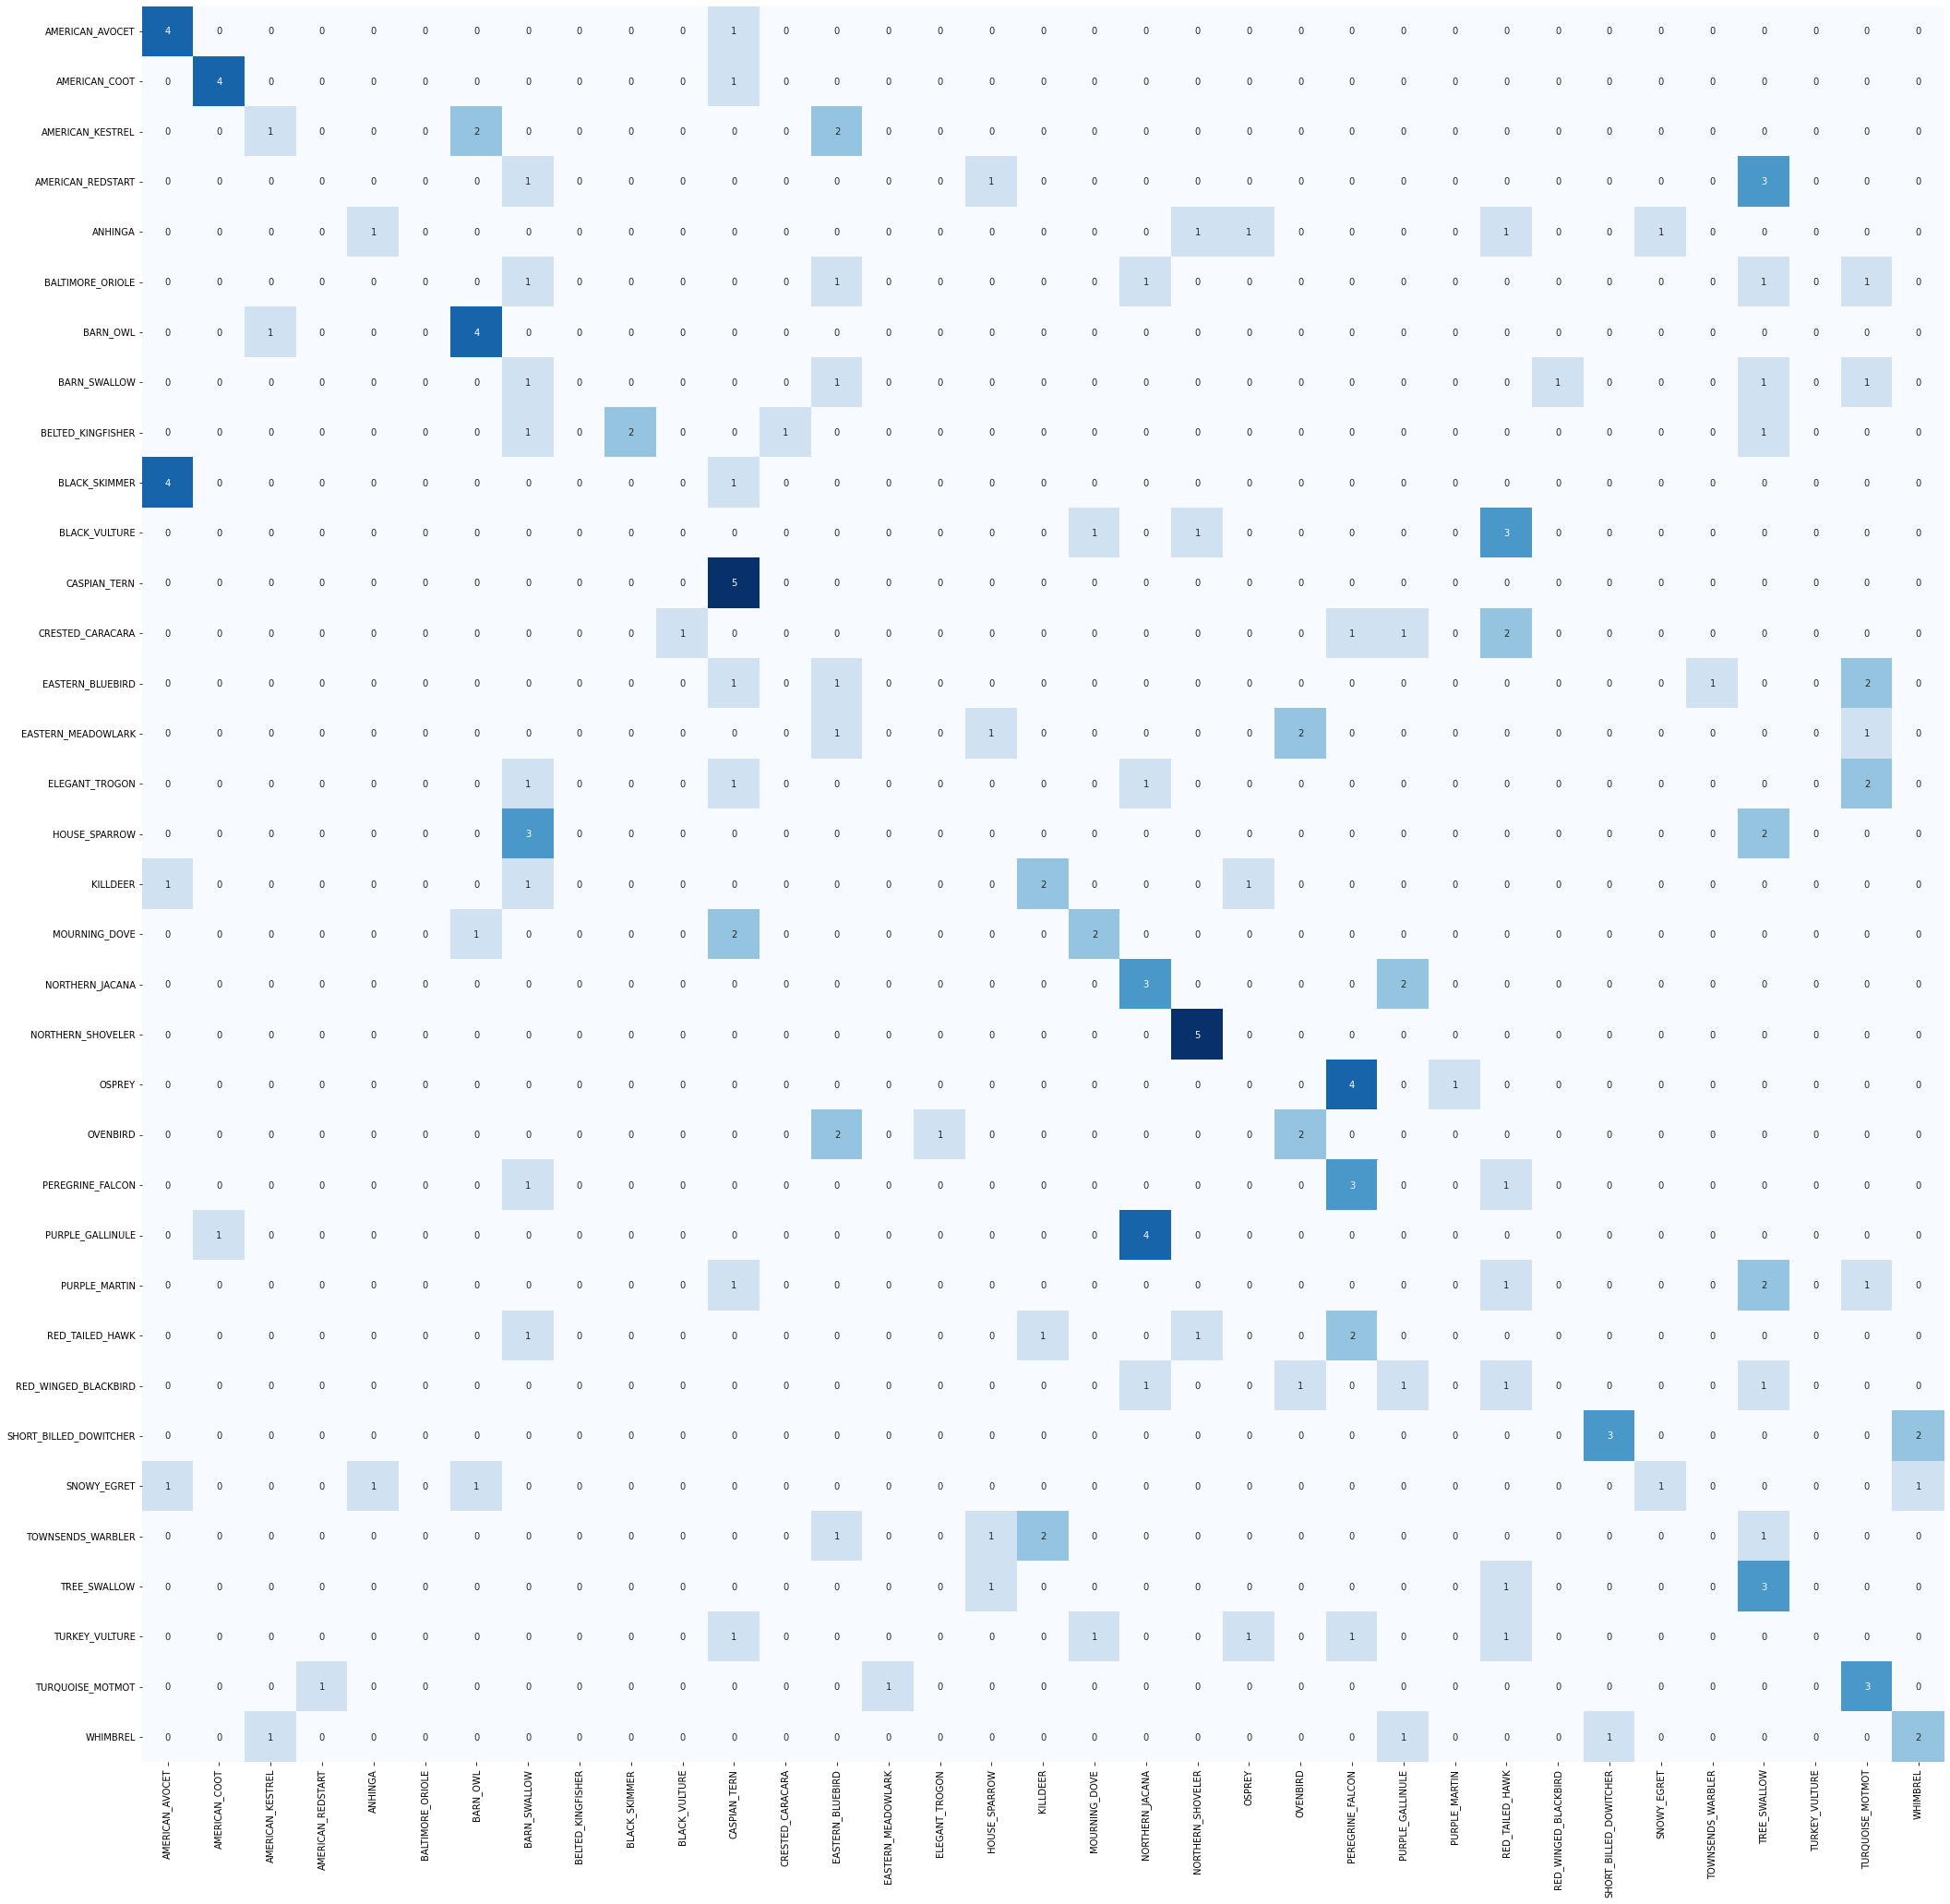

In [ ]:
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
names = ['AMERICAN_AVOCET', 'AMERICAN_COOT', 'AMERICAN_KESTREL', 'AMERICAN_REDSTART', 'ANHINGA', 'BALTIMORE_ORIOLE',
         'BARN_OWL', 'BARN_SWALLOW', 'BELTED_KINGFISHER', 'BLACK_SKIMMER', 'BLACK_VULTURE', 'CASPIAN_TERN', 
         'CRESTED_CARACARA', 'EASTERN_BLUEBIRD', 'EASTERN_MEADOWLARK', 'ELEGANT_TROGON', 'HOUSE_SPARROW', 'KILLDEER', 
         'MOURNING_DOVE', 'NORTHERN_JACANA', 'NORTHERN_SHOVELER', 'OSPREY', 'OVENBIRD', 'PEREGRINE_FALCON', 'PURPLE_GALLINULE', 
         'PURPLE_MARTIN', 'RED_TAILED_HAWK', 'RED_WINGED_BLACKBIRD', 'SHORT_BILLED_DOWITCHER', 'SNOWY_EGRET',
         'TOWNSENDS_WARBLER', 'TREE_SWALLOW', 'TURKEY_VULTURE' , 'TURQUOISE_MOTMOT', 'WHIMBREL']
columns = ['%s' %(i) for i in list(names)[0:len(np.unique(y_real))]]

confm = confusion_matrix(y_real, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

plt.figure(figsize=(35,35))
ax = sn.heatmap(df_cm, cmap='Blues', annot=True, cbar=False)